In [167]:
# importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_rows', 100)

# for suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

# 1.Reading and Understanding the Data

In [168]:
# read the data
scotch_data = pd.read_csv('scotch_review.csv')
scotch_data.drop('Unnamed: 0', axis=1, inplace=True)
scotch_data.head()

,name,category,review.point,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [169]:
# check the shape
scotch_data.shape

(2247, 6)

In [170]:
# check the info
scotch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2247 non-null   object
 1   category      2247 non-null   object
 2   review.point  2247 non-null   int64 
 3   price         2247 non-null   object
 4   currency      2247 non-null   object
 5   description   2247 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.5+ KB


In [171]:
# check the description of the numeric columns
scotch_data.describe()

,review.point
count,2247.000000
mean,86.700045
std,4.054055
min,63.000000
25%,84.000000
50%,87.000000
75%,90.000000
max,97.000000


- As we can see describe function consider only **review.point** as a numeric column because we can see in the result of **info** function price feature data type given as object.
- So we have to check the values of the **price** feature during data cleaning process.

# 2.Data Cleaning

In [172]:
# check the missing values
scotch_data.isnull().sum().sort_values(ascending=False)

name            0
category        0
review.point    0
price           0
currency        0
description     0
dtype: int64

In [173]:
# check the values of price feature
for i in scotch_data.price:
    print(i)

225
4500.00
13500.00
325
160
85.00
6250.00
11000.00
1500.00
3360
750.00
1500.00
3108
105.00
120
3500.00
70.00
20000.00
70.00
$15,000 or $60,000/set
26650
400.00
200.00
400.00
455.00
750
200.00
460.00
2525.00
1250.00
280.00
500.00
215.00
300.00
400.00
2000.00
4000
225.00
60.00
180
300.00
3500
120
181.00
20000.00
800.00
250.00
500.00
6000.00
30,000
645.00
11824
1250
550.00
700.00
140.00
400.00
700.00
387
5730.00
100
325.00
300.00
350.00
350.00
6088.00
3500.00
112.00
109.00
130
100.00
120.00
1900.00
100.00
200.00
1400
84.00
3000
225
164
50.00
150
140
175
1100
157000.00
850
34.00
600.00
225
55.00
60
600.00
400.00
250.00
60,000/set
90.00
191.00
1925
2200
1,700
430.00
1,100
150.00
300.00
135
250.00
3000.00
750.00
60,000
95.00
262
750
599.00
9420.00
600.00
2000.00
100.00
350.00
45
85.00
2850.00
500.00
1000.00
150.00
100.00
1900.00
3657.00
127.00
167
1200
525.00
280.00
3500.00
80.00
304
370.00
455.00
3300
4000
3,500
580.00
200.00
240.00
300.00
65.00
4500
4,000
170.00
60
300
248.00
2000
76
236


In [174]:
# replace the unnecessary values
scotch_data['price'] = scotch_data.price.apply(lambda x: x.replace(",","").replace("/","").replace("set","").replace("liter",""))

In [175]:
# check the value
for i in scotch_data['price']:
    if '/' in i:
        print(i)

 - There is one value in price column which has two values so lets check the row of that value and delete that row from the table because we only have one such row.

In [176]:
# delete the row 
scotch_data = scotch_data[~(scotch_data['price']=='$15000 or $60000')]

In [177]:
# check the result
scotch_data[scotch_data['price']=='$15000 or $60000']

,name,category,review.point,price,currency,description


In [178]:
# change the data type of price feature
scotch_data['price'] = scotch_data.price.astype('float')

In [179]:
# check the result
scotch_data.price.dtype

dtype('float64')

- Now we are successfully converted the data type of price feature, lets check the description of price feature

In [180]:
# check the description of the price feature
scotch_data.describe()

,review.point,price
count,2246.000000,2246.000000
mean,86.696349,636.725289
std,4.051171,4693.904590
min,63.000000,12.000000
25%,84.000000,70.000000
50%,87.000000,110.000000
75%,90.000000,200.000000
max,97.000000,157000.000000


- As we can see the difference between the middle value and the maximum value is very high which means there could be outliers in the data and the distribution of the price feature is not normally distributed.
- Lets check both the things

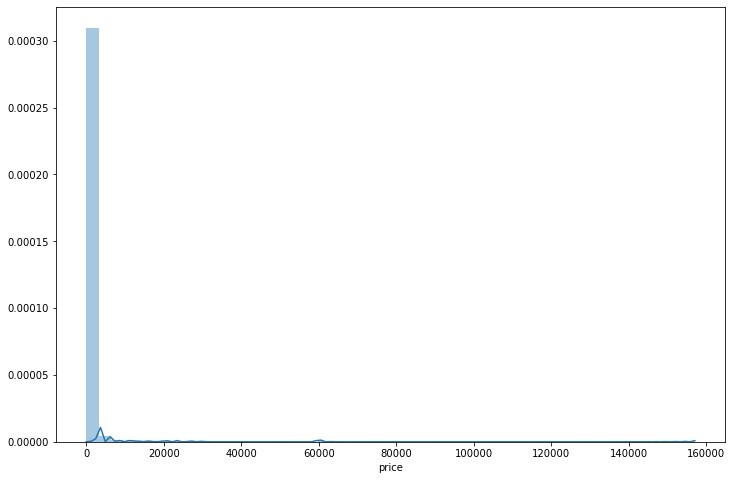

In [181]:
# check the distribution of the price features
plt.figure(figsize=(12,8))
sns.distplot(scotch_data['price'])
plt.show()

- As we can see clearly from the graph that the data is not normally distributed and it is right skewed data.
- Now lets check the outliers with the help of boxplot

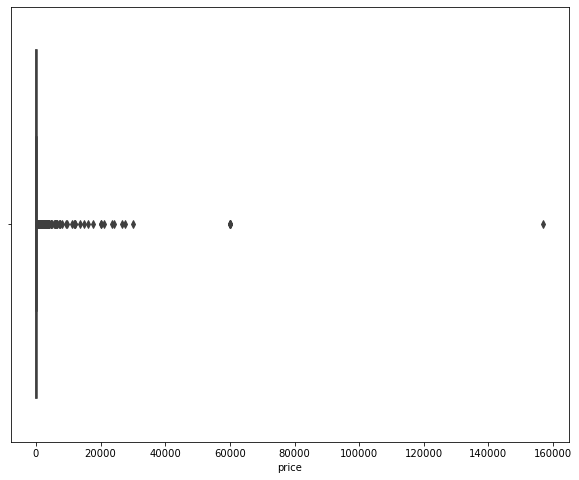

In [182]:
# check the outliers
plt.figure(figsize=(10,8))
sns.boxplot(scotch_data['price'])
plt.show()

- It looks there are some outliers in the data but at the same time we know that we have to answer the question of Expensive scotch related so we have to carefully consider the outliers.
- So for that first we have to check the details of higher values first and accordingly consider it.
- We can see in the graph values more than 20000 looks out of range value so we have to check the values which is greater than 20000.

In [183]:
# check the details of the higher range of values
scotch_data[scotch_data['price']>20000]

,name,category,review.point,price,currency,description
20,"Bowmore 50 year old (distilled 1961), 40.7%",Single Malt Scotch,95,26650.0,$,"The whisky is sensational, a glorious mix of g..."
49,"Bowmore 1966 50 year old, 41.5%",Single Malt Scotch,94,30000.0,$,The third and most exclusive release in Bowmor...
85,"Diamond Jubilee by John Walker & Sons, 42.5%",Blended Scotch Whisky,93,157000.0,$,Bright gold. Amazingly fresh fruits and quince...
95,"Balvenie 1961 55 year old, 41.7%",Single Malt Scotch,93,60000.0,$,Aged in a European oak oloroso sherry hogshead...
109,"Dalmore 50 year old, 40%",Single Malt Scotch,93,60000.0,$,This veteran Dalmore was matured successively ...
316,"The Dalmore 1969 aged 42 years, 45.5%",Single Malt Scotch,91,24000.0,$,"Initially filled into an ex-bourbon cask, then..."
356,"Tullibardine 1952, 40.2%",Single Malt Scotch,91,23427.0,$,This bottling is from the oldest cask owned by...
409,Balvenie DCS Compendium 1st Chapter 1968 46 ye...,Single Malt Scotch,90,27620.0,$,The oldest of the set shows a shift into a sen...
410,"Balvenie 1981 35 year old, 43.8%",Single Malt Scotch,90,60000.0,$,A refill American oak hogshead matured this wh...
469,Gordon & MacPhail Generations: The Glenlivet 7...,Single Malt Scotch,90,21000.0,$,You would expect any 70 year old whisky to be ...


In [184]:
# check the number of such higher values
scotch_data[scotch_data['price']>20000].shape[0]

12

- So we can see that only 12 such values are there in the dataset which can be consider as an outlier but before removing them lets build the model wihtout removing them and then we will decide based on the result whether we have to consider it as an outlier or not

# 3.Data Preparation

In [185]:
# check the data
scotch_data.head()

,name,category,review.point,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,$,"Captivating, enticing, and wonderfully charmin..."


In [186]:
# scale the features
scotch_data_model = scotch_data[['review.point','price']]
# instantiating an object and fitting
scotch_data_model_scaled = StandardScaler().fit_transform(scotch_data_model)
scotch_data_model_scaled

array([[ 2.54394234, -0.08773442],
       [ 2.54394234,  0.82322403],
       [ 2.54394234,  2.74103127],
       ...,
       [-4.12228146, -0.11863242],
       [-4.12228146, -0.08773442],
       [-5.85056171, -0.12289422]])

In [187]:
# convert the array into dataframe
scotch_data_model_scaled = pd.DataFrame(scotch_data_model_scaled)
scotch_data_model_scaled.columns = ['review.point','price']

In [188]:
# check the result
scotch_data_model_scaled.head()

,review.point,price
0,2.543942,-0.087734
1,2.543942,0.823224
2,2.543942,2.741031
3,2.297045,-0.066425
4,2.297045,-0.101585


# 4.Model Building

In [189]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scotch_data_model_scaled)

KMeans(max_iter=50, n_clusters=4)

In [190]:
# check the label
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

## Finding the Optimal Number of Clusters

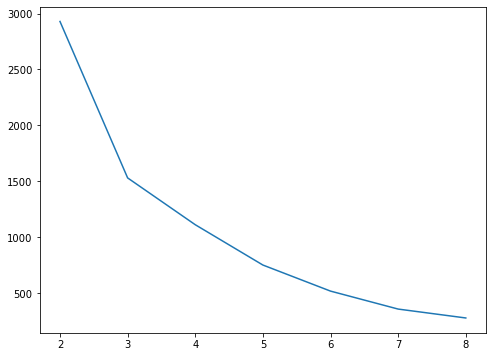

In [191]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_cluster
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, ssd)
plt.show()

In [192]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scotch_data_model_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9255309812898957
For n_clusters=3, the silhouette score is 0.5326998170088145
For n_clusters=4, the silhouette score is 0.5138477317938657
For n_clusters=5, the silhouette score is 0.5157594423017804
For n_clusters=6, the silhouette score is 0.5315974299305332
For n_clusters=7, the silhouette score is 0.5296787775596088
For n_clusters=8, the silhouette score is 0.5326153739254543


In [193]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scotch_data_model_scaled)

KMeans(max_iter=50, n_clusters=3)

In [194]:
# check the label
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [195]:
# assign the label
scotch_data_model['cluster_id'] = kmeans.labels_
scotch_data_model.head()

,review.point,price,cluster_id
0,97,225.0,1
1,97,4500.0,1
2,97,13500.0,1
3,96,325.0,1
4,96,160.0,1


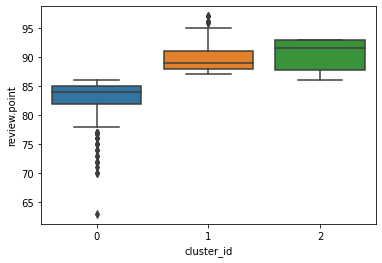

In [196]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='review.point', data=scotch_data_model)
plt.show()

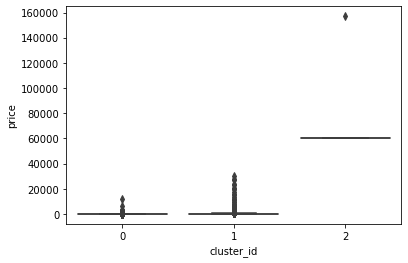

In [197]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='price', data=scotch_data_model)
plt.show()

In [198]:
# check the third cluster values in more detail
scotch_data_model[scotch_data_model['cluster_id']==2]

,review.point,price,cluster_id
85,93,157000.0,2
95,93,60000.0,2
109,93,60000.0,2
410,90,60000.0,2
1000,87,60000.0,2
1215,86,60000.0,2


- From the above graph and the data we can conclude that all the values of the third cluster are outlier and they are very less also in numbers.
- So we are again building model after removing these value from the dataset

In [199]:
# droping the values
scotch_data = scotch_data[~(scotch_data['price']>40000)]

In [200]:
# check the result
scotch_data[scotch_data['price']>40000]

,name,category,review.point,price,currency,description


In [201]:
# scale the features
scotch_data_model2 = scotch_data[['review.point','price']]
# instantiating an object and fitting
scotch_data_model_scaled2 = StandardScaler().fit_transform(scotch_data_model2)
scotch_data_model_scaled2

array([[ 2.54747382, -0.11598348],
       [ 2.54747382,  2.25172773],
       [ 2.54747382,  7.23638291],
       ...,
       [-4.1216984 , -0.19629181],
       [-4.1216984 , -0.11598348],
       [-5.85074304, -0.20736883]])

In [202]:
# convert the array into dataframe
scotch_data_model_scaled2 = pd.DataFrame(scotch_data_model_scaled2)
scotch_data_model_scaled2.columns = ['review.point','price']

In [203]:
# check the result
scotch_data_model_scaled2.head()

,review.point,price
0,2.547474,-0.115983
1,2.547474,2.251728
2,2.547474,7.236383
3,2.300467,-0.060598
4,2.300467,-0.151984


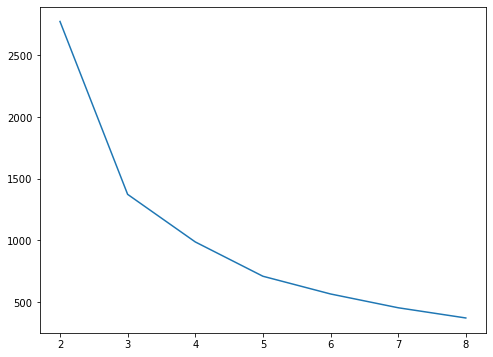

In [204]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_cluster
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, ssd)
plt.show()

In [206]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scotch_data_model_scaled2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8741861584622104
For n_clusters=3, the silhouette score is 0.519439569589208
For n_clusters=4, the silhouette score is 0.4887916867981153
For n_clusters=5, the silhouette score is 0.5102618652550645
For n_clusters=6, the silhouette score is 0.5005678950573548
For n_clusters=7, the silhouette score is 0.5037679407571579
For n_clusters=8, the silhouette score is 0.5058476576883214


In [207]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scotch_data_model_scaled2)

KMeans(max_iter=50, n_clusters=3)

In [208]:
# check the label
kmeans.labels_

array([1, 1, 2, ..., 0, 0, 0])

In [209]:
# assign the label
scotch_data_model2['cluster_id'] = kmeans.labels_
scotch_data_model2.head()

,review.point,price,cluster_id
0,97,225.0,1
1,97,4500.0,1
2,97,13500.0,2
3,96,325.0,1
4,96,160.0,1


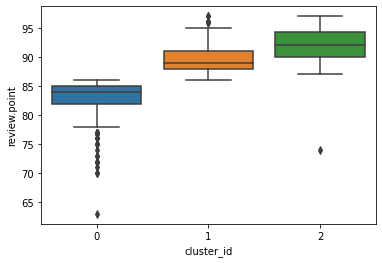

In [210]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='review.point', data=scotch_data_model2)
plt.show()

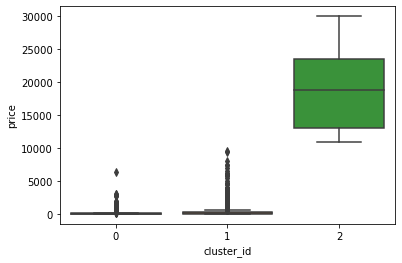

In [211]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='price', data=scotch_data_model2)
plt.show()

- From the above graph we can conclude that in the third clusters values are more fluctuating or in other words maybe because of some out of range value this happen.
- So this time we are using statistical method to remove these outliers or out of range values.

In [220]:
# removing outliers
Q1 = scotch_data.price.quantile(0.05)
Q3 = scotch_data.price.quantile(0.95)
IQR = Q3 - Q1

scotch_data = scotch_data[(scotch_data.price >= Q1 - 1.5*IQR) & (scotch_data.price <= Q3 + 1.5*IQR)]

In [229]:
# scale the features
scotch_data_model3 = scotch_data[['review.point','price']]
# instantiating an object and fitting
scotch_data_model_scaled3 = StandardScaler().fit_transform(scotch_data_model3)
scotch_data_model_scaled3

array([[ 2.61955393,  0.01737963],
       [ 2.36849132,  0.29414139],
       [ 2.36849132, -0.16251552],
       ...,
       [-4.15913649, -0.38392493],
       [-4.15913649,  0.01737963],
       [-5.91657475, -0.43927728]])

In [230]:
# convert the array into dataframe
scotch_data_model_scaled3 = pd.DataFrame(scotch_data_model_scaled3)
scotch_data_model_scaled3.columns = ['review.point','price']

In [231]:
# check the result
scotch_data_model_scaled3.head()

,review.point,price
0,2.619554,0.017380
1,2.368491,0.294141
2,2.368491,-0.162516
3,2.368491,-0.370087
4,2.368491,3.546092


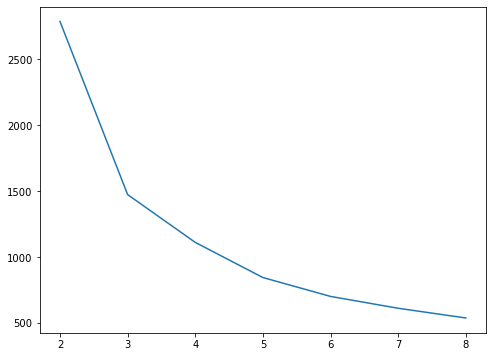

In [232]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled3)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_cluster
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, ssd)
plt.show()

In [233]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scotch_data_model_scaled3)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scotch_data_model_scaled3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.687990441703008
For n_clusters=3, the silhouette score is 0.4760165450583514
For n_clusters=4, the silhouette score is 0.4250180604659102
For n_clusters=5, the silhouette score is 0.4529026570034037
For n_clusters=6, the silhouette score is 0.42606800751408697
For n_clusters=7, the silhouette score is 0.43184023895579277
For n_clusters=8, the silhouette score is 0.4159635702748418


In [234]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scotch_data_model_scaled3)

KMeans(max_iter=50, n_clusters=3)

In [235]:
# check the label
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [236]:
# assign the label
scotch_data_model3['cluster_id'] = kmeans.labels_
scotch_data_model3.head()

,review.point,price,cluster_id
0,97,225.0,1
3,96,325.0,1
4,96,160.0,1
5,96,85.0,1
8,96,1500.0,0


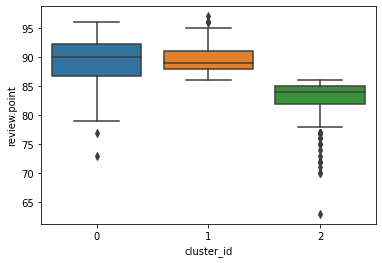

In [237]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='review.point', data=scotch_data_model3)
plt.show()

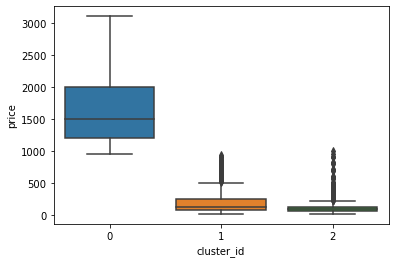

In [238]:
# check the detail with the help of graph
sns.boxplot(x='cluster_id', y='price', data=scotch_data_model3)
plt.show()

In [243]:
# adding the label in original data
scotch_data['cluster_id'] = kmeans.labels_
scotch_data.head()

,name,category,review.point,price,currency,description,cluster_id
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,$,"Magnificently powerful and intense. Caramels, ...",1
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,$,With a name inspired by a 1926 Buster Keaton m...,1
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,$,"Captivating, enticing, and wonderfully charmin...",1
5,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.0,$,"Powerful, muscular, well-textured, and invigor...",1
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.0,$,The Dalmore is one of a handful of whiskies th...,0


In [250]:
# check the expensive scotch
scotch_data[scotch_data['cluster_id']==0]

,name,category,review.point,price,currency,description,cluster_id
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.0,$,The Dalmore is one of a handful of whiskies th...,0
11,"Macallan 1976 Vintage, 29 year old, cask #1135...",Single Malt Scotch,96,1500.0,$,Classic sherry cask-aged Macallan. Antique amb...,0
12,The Last Drop (distilled at Lochside) 1972 (ca...,Grain Scotch Whisky,96,3108.0,$,A remarkable beauty from the Angus town of Mon...,0
28,"Glenglassaugh, 40 year old, 44.6%",Single Malt Scotch,95,2525.0,$,"An excellent example of an ultra-mature, sherr...",0
29,"The Glenlivet Cellar Collection, 1973 vintage,...",Single Malt Scotch,95,1250.0,$,"A marriage of three casks, one of them an ex-s...",0
35,"The Last Drop, 1960 vintage, 48 year old, 52%",Blended Scotch Whisky,95,2000.0,$,A 12 year old blended whisky was created in 19...,0
52,Brora 1978 35 year old (Diageo Special Release...,Single Malt Scotch,94,1250.0,$,"This is the 13th annual release of Brora, whic...",0
72,"The Macallan 1824 Limited Release, 48%",Single Malt Scotch,94,1900.0,$,Antique amber. The darkest and most decadent o...,0
75,"Black Bull 40 year old 7th release, 47.6%",Blended Scotch Whisky,94,1400.0,$,"Jaw-dropping: Aberlour 1973, Bunnahabhain 1968...",0
77,"Royal Salute 62 Gun Salute, 43%",Blended Scotch Whisky,94,3000.0,$,Named after the gun rounds fired on Royal anni...,0


In [251]:
# check the description of expensive scotch
scotch_data[scotch_data['cluster_id']==0]['description'].value_counts()

The Dalmore is one of a handful of whiskies that seem to be able to age in the cask for many decades and still improve. This one is incredibly viscous on the nose and palate (and very heavy on the tongue), with chewy toffee and old pot still rum. The classic Dalmore marmalade note shines throughout, along with vanilla cream, an array of dried spices (especially cinnamon and evergreen), juicy oak, forest bedding, rancio, old armagnac, polished leather, tobacco, maple syrup, dark chocolate, almond macaroon, and subtle espresso. Long, mouth-coating finish. The flavors evolve like waves lapping on the palate -- especially the interplay with the oak. I can’t drink this whisky slowly enough. A rare experience for the lucky few who can afford it. (Price is per 100ml).                                                                                                                                                                                                                                     

###### From the few description we can conclude that expensive scotch is not tastes better.